In [1]:
import pandas as pd
from konlpy.tag import Okt
import json
import os
from pprint import pprint

In [2]:

def read_data(filename):
    """
    data 읽어서 한 문장 단위+Tab 단위로 쪼개기 위함
    """
    
    with open(filename,'r') as f:
        #한 줄당 list안에 넣고 list안에 tab별로 순서대로 넣기
        #['idx','comment','label']
        data=[line.split('\t')for line in f.read().splitlines()]
        #헤더 제외하고 넣기 
        data=data[1:]
    return data


In [3]:
train_data=read_data("./nsmc/ratings_train.txt")
test_data=read_data("./nsmc/ratings_test.txt")
print(train_data[0])

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']


In [4]:
def tokenize(doc):
    """
    data에 있는 문장을 단어별로 자르고 태깅하기 위함
    '단어/품사'로 저장
    """
    okt=Okt()
    return ['/'.join(t) for t in okt.pos(doc,norm=True,stem=True)]

def get_json(train_data, test_data):
    """
    list에 저장된 데이터를 json 파일로 변경
    """
    if os.path.isfile('./nsmc/train_docs.json'):
        with open('./nsmc/train_docs.json') as f:
            train_docs=json.load(f)
        with open('./nsmc/test_docs.json') as f:
            test_docs=json.load(f)
    else:
        #data에 있는 단어들에서 [['comment'],'label']로 구성
        train_docs=[(tokenize(row[1]),row[2]) for row in train_data]
        test_docs=[(tokenize(row[1]),row[2]) for row in test_data]
        
        with open('./nsmc/train_docs.json','w',encoding='utf-8') as make_file:
            json.dump(train_docs,make_file,ensure_ascii=False, indent="\t")
            
        with open('./nsmc/test_docs.json','w',encoding='utf-8') as make_file:
            json.dump(test_docs,make_file,ensure_ascii=False, indent="\t")
    
    return train_docs, test_docs
        
train_docs, test_docs=get_json(train_data, test_data)
print(train_docs[0])

[['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun'], '0']


In [5]:
pprint(train_docs[0])

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0']


전체 토큰 개수:  2159921
중복 제외 토큰 개수:  49895


/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s

/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jihyun/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, fla

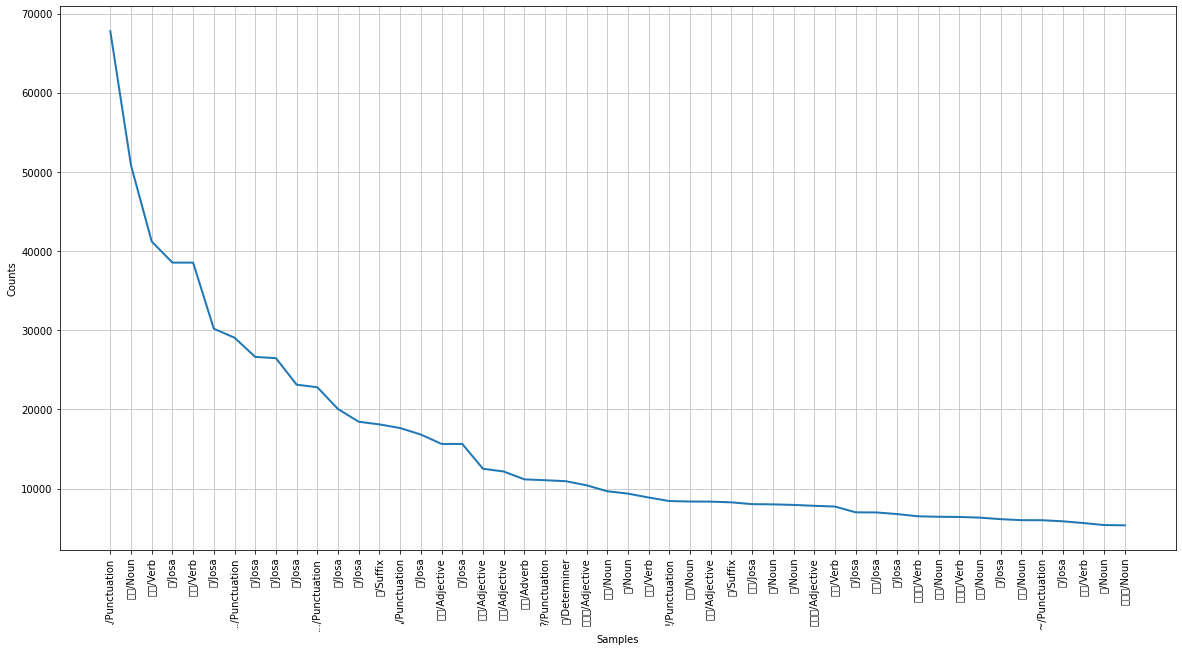

In [6]:
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

def check_Top_Frequency(train_docs):
    tokens=[t for d in train_docs for t in d[0]]
    text=nltk.Text(tokens,name='NMSC')
    
    print("전체 토큰 개수: ", len(tokens))
    print("중복 제외 토큰 개수: ", len(set(text.tokens)))

    plt.figure(figsize=(20,10))
    text.plot(50)
    
    return text
    
text=check_Top_Frequency(train_docs)

In [7]:
#자주 사용되는 토큰 10000개를 사용하여 데이터 벡터화 
#CountVectorization사용하여 벡터화 진행
selected_words = [f[0] for f in text.vocab().most_common(10000)]

In [ ]:
import numpy as np

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

def preprocessing():
    train_x=[term_frequency(d) for d,_ in train_docs]
    test_x=[term_frequency(d) for d,_ in test_docs]
    train_y=[ c for _, c in train_docs]
    test_y=[ c for _, c in test_docs]
    
    x_train = np.asarray(train_x).astype('float32')
    x_test = np.asarray(test_x).astype('float32')

    y_train = np.asarray(train_y).astype('float32')
    y_test = np.asarray(test_y).astype('float32')
    
    return x_train,x_test, y_train,y_test

x_train,x_test, y_train,y_test=preprocessing()

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

def train():
    inputs=Input(shape=(256,10000,))
    lstm1=layers.LSTM(256,return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
    lstm1_output,state_h1,state_c1=lstm1(inputs)
    
    lstm2=layers.LSTM(256,return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
    lstm2_output,state_h2,state_c2=lstm2(lstm1_output)
    
    lstm3=layers.LSTM(256,return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
    lstm3_output,state_h3,state_c3=lstm3(lstm2_output)
    
    lstm4=layers.LSTM(256,return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
    lstm4_output,state_h4,state_c4=lstm4(lstm3_output)
    
    fcn=layers.Dense(1,activation='sigmoid')
    outputs=fcn(lstm4_output)
    
    model=Model([inputs],outputs)
    model.summary()
    

    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                 loss=losses.binary_crossentropy,
                 metrics=[metrics.binary_accuracy])
    
    x=np.reshape(x_train,(-1,1,10000))
    y=np.reshape(y_train,(-1,1))
    print(x.shape)
    hist=model.fit(x, y, epochs=100, batch_size=512).history
    x_t=np.reshape(x_test,(-1,1,10000))
    y_t=np.reshape(y_test,(-1,1))
    results = model.evaluate(x_t, y_t)
    
    print(results)
    return hist,model

hist,model=train()

Loss:  0.149321511387825
Accuray:  0.9427400231361389


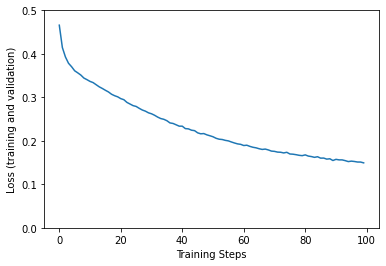

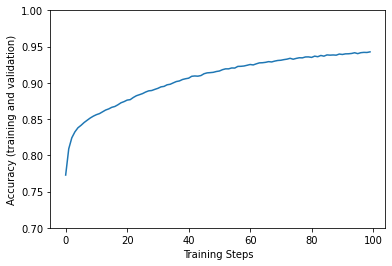

In [141]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,0.5])
plt.plot(hist["loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0.7,1])
plt.plot(hist["binary_accuracy"])

print("Loss: ", hist["loss"][-1])
print("Accuray: ", hist["binary_accuracy"][-1])

In [ ]:
#모델 저장
model.save("./BadComment_Detection.h5")

In [154]:
def predict_pos_neg(review,model):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    data=np.reshape(data,(-1,1,10000))
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 긍정 댓글입니다.\n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 악성 댓글입니다.\n".format(review, (1 - score) * 100))

In [161]:
predict_pos_neg("연기 정말 잘하는 듯?",model)
predict_pos_neg("진짜 못생겼다..",model)
predict_pos_neg("주연 배우 신인인데 몰입감 ㅎㄷㄷ",model)
predict_pos_neg("성괴네ㅋㅋ 성형괴물",model)
predict_pos_neg("너무 무서워 악의없는 건전한 비판도 못하겠다",model)
predict_pos_neg("좋은 활약 기대합니다 ^^",model)
predict_pos_neg("악플 모두 신고합니다",model)

[연기 정말 잘하는 듯?]는 82.75% 확률로 긍정 댓글입니다.

[진짜 못생겼다..]는 97.48% 확률로 악성 댓글입니다.

[주연 배우 신인인데 몰입감 ㅎㄷㄷ]는 99.57% 확률로 긍정 댓글입니다.

[성괴네ㅋㅋ 성형괴물]는 59.88% 확률로 악성 댓글입니다.

[너무 무서워 악의없는 건전한 비판도 못하겠다]는 84.14% 확률로 악성 댓글입니다.

[좋은 활약 기대합니다 ^^]는 97.45% 확률로 긍정 댓글입니다.

[악플 모두 신고합니다]는 88.87% 확률로 긍정 댓글입니다.

